In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import cv2


Using TensorFlow backend.


In [2]:
#Define path to the daa directory
data_dir = Path('./dataset/chest_xray/chest_xray')
# Path to train directory
train_dir = data_dir / 'train'
# Path to validation directory
val_dir = data_dir / 'val'
# Path to test directory
test_dir = data_dir / 'test'


In [3]:
import glob3 as glob
def data_path(Dir):
    # Get the path to the normal and pneumonia sub-directories
    normal_cases_dir = Dir / 'NORMAL'
    pneumonia_cases_dir = Dir / 'PNEUMONIA'

    # Get the list of all the images
    normal_cases = normal_cases_dir.glob('*.jpeg')
    pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

    # An empty list. We will insert the data into this list in (img_path, label) format
    data = []

    for img in normal_cases:
        data.append((img, 0))

    for img in pneumonia_cases:
        data.append((img, 1))

    # Get a pandas dataframe from the data we have in our list 
    data = pd.DataFrame(data, columns=['image', 'label'],index=None)

    # Shuffle the data 
    data = data.sample(frac=1.).reset_index(drop=True)

    return data

In [4]:
train_data = data_path(train_dir)    
train_data.head()

,image,label
0,dataset\chest_xray\chest_xray\train\PNEUMONIA\...,1
1,dataset\chest_xray\chest_xray\train\PNEUMONIA\...,1
2,dataset\chest_xray\chest_xray\train\PNEUMONIA\...,1
3,dataset\chest_xray\chest_xray\train\PNEUMONIA\...,1
4,dataset\chest_xray\chest_xray\train\PNEUMONIA\...,1


In [5]:
test_data = data_path(test_dir)
test_data.head()

,image,label
0,dataset\chest_xray\chest_xray\test\PNEUMONIA\p...,1
1,dataset\chest_xray\chest_xray\test\NORMAL\NORM...,0
2,dataset\chest_xray\chest_xray\test\PNEUMONIA\p...,1
3,dataset\chest_xray\chest_xray\test\PNEUMONIA\p...,1
4,dataset\chest_xray\chest_xray\test\NORMAL\NORM...,0


In [6]:
val_data = data_path(val_dir)
val_data.head()

,image,label
0,dataset\chest_xray\chest_xray\val\NORMAL\NORMA...,0
1,dataset\chest_xray\chest_xray\val\PNEUMONIA\pe...,1
2,dataset\chest_xray\chest_xray\val\NORMAL\NORMA...,0
3,dataset\chest_xray\chest_xray\val\PNEUMONIA\pe...,1
4,dataset\chest_xray\chest_xray\val\NORMAL\NORMA...,0


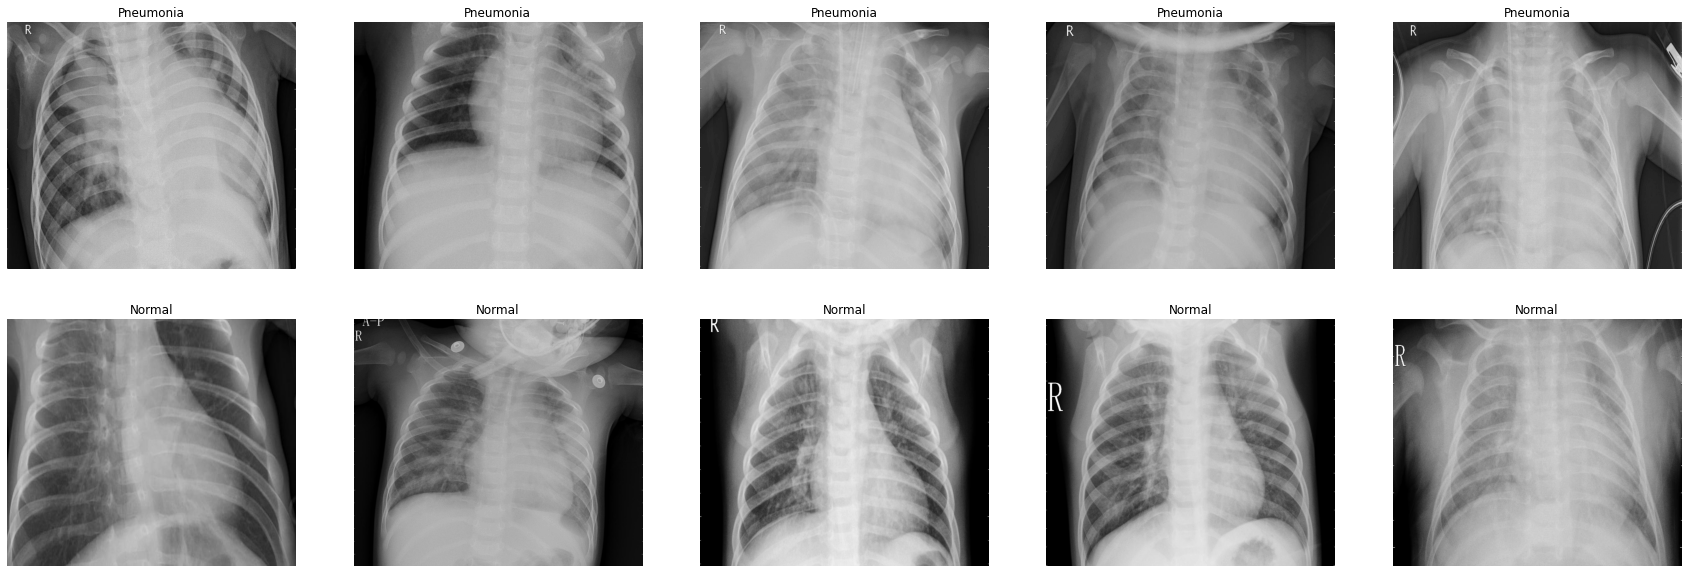

In [7]:
# Get few samples for both the classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:10]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:10]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [8]:
from keras.utils.np_utils import to_categorical

def preparing_data(data):
    
    x = []
    y = []
    pneumonia_cases = (data[data['label']==1]['image'].iloc[:])
    normal_cases = (data[data['label']==0]['image'].iloc[:])
    
    # Normal cases
    for img in normal_cases:
        img = cv2.imread(str(img))
        img = cv2.resize(img, (224,224))
        if img.shape[2] ==1:
            img = np.dstack([img, img, img])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype(np.float32)/255.
        label = to_categorical(0, num_classes=2)
        x.append(img)
        y.append(label)

    # Pneumonia cases        
    for img in pneumonia_cases:
        img = cv2.imread(str(img))
        img = cv2.resize(img, (224,224))
        if img.shape[2] ==1:
            img = np.dstack([img, img, img])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype(np.float32)/255.
        label = to_categorical(1, num_classes=2)
        x.append(img)
        y.append(label)

    # Convert the list into numpy arrays
    x = np.array(x)
    y = np.array(y)

    
    return x, y

In [9]:
x_train, y_train =preparing_data(train_data)
print(x_train.shape)
print(y_train.shape)

(5216, 224, 224, 3)
(5216, 2)


In [10]:
x_test ,y_test =preparing_data(test_data)
print(x_test.shape)
print(y_test.shape)

(624, 224, 224, 3)
(624, 2)


In [11]:
valid_data, valid_labels = preparing_data(val_data)
print(valid_data.shape)
print(valid_labels.shape)

(16, 224, 224, 3)
(16, 2)


## Image Augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


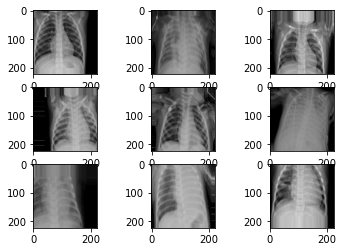

In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=False,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=False,
    fill_mode='nearest',
    )

datagen.fit(x_train)

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(224, 224, 3))
    # show the plot
    plt.show()
    break

In [13]:
import imgaug as ia
import imgaug.augmenters as iaa
ia.seed(1)

In [14]:
seq = iaa.Sequential([   
        iaa.Fliplr(), # horizontal flips
        iaa.Affine(), # roatation
        iaa.Add((-10, 10), per_channel=0.2),
        iaa.ContrastNormalization((0.9, 1.1)),
        iaa.EdgeDetect(alpha=(0, 0.5)),
        iaa.Emboss(alpha=(0, 1.0), strength=(0, 1.0)),
        iaa.Multiply((0.40, 0.60), per_channel=0.2)], random_order=True)

C:\Anaconda3\envs\yapay-zeka\lib\site-packages\imgaug\imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


In [15]:
def data_generator(train_data, batch_size):
    n = len(train_data)
    steps = n / batch_size

    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, 224, 224, 3), dtype=np.float32)
    batch_labels = np.zeros((batch_size, 2), dtype=np.float32)
    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)

    # Initialize a counter
    i = 0

    while True:
        np.random.shuffle(indices)
        # Get the next batch
        count = 0
        next_batch = indices [(i*batch_size):(i+1)*batch_size]
        
        for j, idx in enumerate(next_batch):
            
            img_name =  train_data.iloc[idx]["image"]
            label = train_data.iloc[idx]["label"]
            
             # one hot encoding
            encoded_label = to_categorical(label, num_classes=2)
            # read the image and resize
            img = cv2.imread(str(img_name))
            img = cv2.resize(img, (224,224))
            
            # check if it's grayscale
            if img.shape[2]==1:
                img = np.dstack([img, img, img])
            
            # cv2 reads in BGR mode by default
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # normalize the image pixels
            orig_img = img.astype(np.float32)/255.
            
            batch_data[count] = orig_img
            batch_labels[count] = encoded_label
               # generating more samples of the undersampled class
            if label==0 and count < batch_size-2:
                aug_img1 = seq.augment_image(img)
                aug_img2 = seq.augment_image(img)
                aug_img1 = cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB)
                aug_img2 = cv2.cvtColor(aug_img2, cv2.COLOR_BGR2RGB)
                aug_img1 = aug_img1.astype(np.float32)/255.
                aug_img2 = aug_img2.astype(np.float32)/255.

                batch_data[count+1] = aug_img1
                batch_labels[count+1] = encoded_label
                batch_data[count+2] = aug_img2
                batch_labels[count+2] = encoded_label
                count +=2
            
            else:
                count+=1
            
            if count==batch_size-1:
                break
            
        i+=1
        yield batch_data, batch_labels
            
        if i>=steps:
            i=0
 

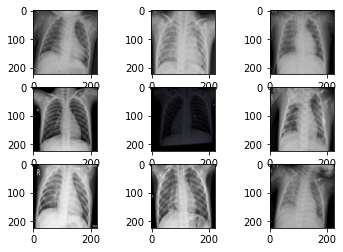

In [16]:
batch_size = 16
nb_epochs = 20

# Get a train data generator
train_data_gen = data_generator(train_data, batch_size)

for X_batch, y_batch in train_data_gen:
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(224, 224, 3))
    # show the plot
    plt.show()
    break


In [17]:
from model.model_codiv19 import build_model
model = build_model()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ImageInput (InputLayer)      (None, 224, 224, 3)       0         
_________________________________________________________________
Conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
Conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
Conv2_1 (SeparableConv2D)    (None, 112, 112, 128)     8896      
_________________________________________________________________
Conv2_2 (SeparableConv2D)    (None, 112, 112, 128)     17664     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0   

In [18]:
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

optimizer = Adam(lr=0.0001 , decay=1e-5)
es = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath = 'best_model_todate', save_best_only=True, save_weights_only=True)
model.compile(optimizer=optimizer ,loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Define the number of training steps
nb_train_steps = train_data.shape[0]//batch_size
print("Number of training and validation steps: {} and {}".format(nb_train_steps, len(valid_data)))

Number of training and validation steps: 326 and 16


In [20]:
history = model.fit_generator(train_data_gen, epochs=nb_epochs, steps_per_epoch=nb_train_steps,
                             validation_data=(valid_data, valid_labels),callbacks=[es,checkpoint],
                             class_weight={0:1.0, 1:0.4})

Epoch 1/20
326/326 [==============================] - 1396s 4s/step - loss: 0.3069 - accuracy: 0.7066 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/20
326/326 [==============================] - 1345s 4s/step - loss: 0.2147 - accuracy: 0.8549 - val_loss: 0.5899 - val_accuracy: 0.8750
Epoch 3/20
326/326 [==============================] - 1332s 4s/step - loss: 0.1529 - accuracy: 0.9126 - val_loss: 1.1420 - val_accuracy: 0.5000
Epoch 4/20
326/326 [==============================] - 1395s 4s/step - loss: 0.1523 - accuracy: 0.9122 - val_loss: 1.1532 - val_accuracy: 0.5625
Epoch 5/20
326/326 [==============================] - 1363s 4s/step - loss: 0.1425 - accuracy: 0.9218 - val_loss: 0.8303 - val_accuracy: 0.8125
Epoch 6/20
326/326 [==============================] - 1392s 4s/step - loss: 0.1313 - accuracy: 0.9329 - val_loss: 0.4489 - val_accuracy: 0.7500
Epoch 7/20
326/326 [==============================] - 1368s 4s/step - loss: 0.1233 - accuracy: 0.9411 - val_loss: 0.4259 - val_accuracy: